<a href="https://colab.research.google.com/github/raviyadav44/Different_EDA_techiniques/blob/main/Standardisation_normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Standardisation and Normalisation

####Why transformation of features are Required?

1. Linear Regression---Gradient Descent---Global Minima
2. Algorithms like KNN ,K means,SVM,Hierarichal Clustering ---Eucledian Distance---
3. logistic regression , or herirchal clustering all these above algo required standardisation or scaling 

####ALGOS Which doesnt required transformation are --

1. Decision tree [ensemble techinique]
2. random forest
3. XGBoost


####Deep learning techiniques in whic we require transformation are

1. ANN--> global minima,Gradient decent
2. CNN --> different kind of normalize by dividing (0-255) for images
3. RNN --> we have lstm so we require standardisation.

#Types of transformation

1. Normalisation and Standardisation
2. Scaling to Mininum And Maximum values
3. Scaling to Meadian And Quarties
4. Guassian Transformation
* logarithimic transformation
* Reciprocal Transformation
* Square Root Transformation
* Exponential Transformation
* Box Cox Transformation

####Standardisation-->squizing it to similar scale . centering the variable to zero.
 
 z=(x-x_mean)/std
 * mean-->0
 * std-->1

In [47]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/MyDrive/titanic/titanic.csv',usecols=['pclass','age','fare','survived'])
df.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [48]:
df['age'].fillna(df.age.median(),inplace=True)

In [49]:
df.isnull().sum()

survived    0
pclass      0
age         0
fare        0
dtype: int64

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


###Note: difference between fit and fit_transform

* When we are applying the ML algo we **only** do the fit .[during training]

* but when we are applying the standardissation and also fitting it like actually changing the features then we use fit)transform.

In [51]:
df_scaled=scaler.fit_transform(df)
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [52]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


transformation is applied column wise.

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

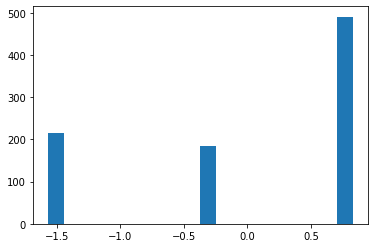

In [54]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

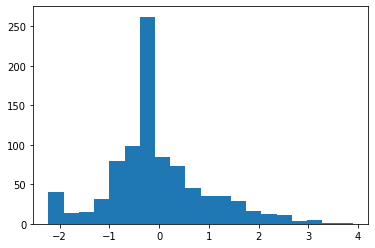

In [55]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

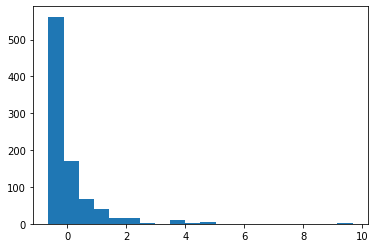

In [56]:
plt.hist(df_scaled[:,3],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

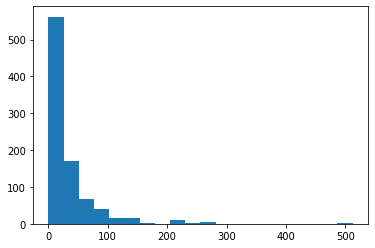

In [57]:
plt.hist(df['fare'],bins=20)

#Minmax Scalar (works well with CNN--Deep learning)

transform the values between 0 and 1.
 
 Min Max Scaling 
 X_scale=(X-X_min/(X.max-X.min)

In [58]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,survived,pclass,age,fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

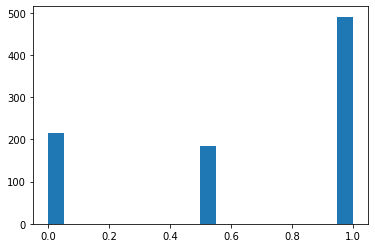

In [59]:
plt.hist(df_minmax['pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

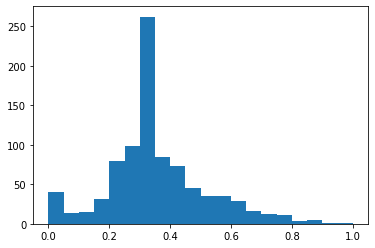

In [60]:
plt.hist(df_minmax['age'],bins=20)

##Robust Sclare [ Used with outlier ]

it is used to scale the features to median and quartiles.
* IQR=3rd quartile[75th quatile] - 1st quartile[25th quantile]
* X_scaled=(X-X.media)/IQR 

In [61]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_rob=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_rob.head()

,survived,pclass,age,fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

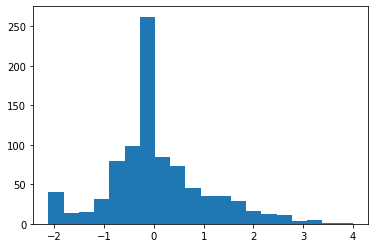

In [62]:
plt.hist(df_rob['age'],bins=20)

#Gaussian Transformation

###lograthmic distribution

when data is skewed

In [63]:
df=pd.read_csv('/content/drive/MyDrive/titanic/titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [64]:
df['age']=df['age'].fillna(df['age'].median())

In [65]:
df.isnull().sum()

survived    0
age         0
fare        0
dtype: int64

###If you want to check wether feature is guassian or normal distributed

###Q-Q plot


In [66]:
import scipy.stats as stat
import pylab

In [67]:
def plot_data(df,feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  df[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(df[feature],dist='norm',plot=pylab)

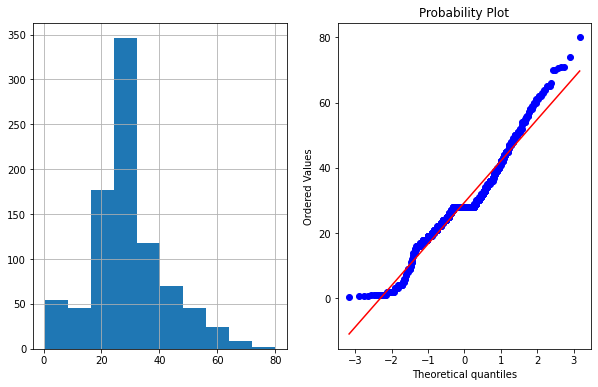

In [68]:
plot_data(df,'age')

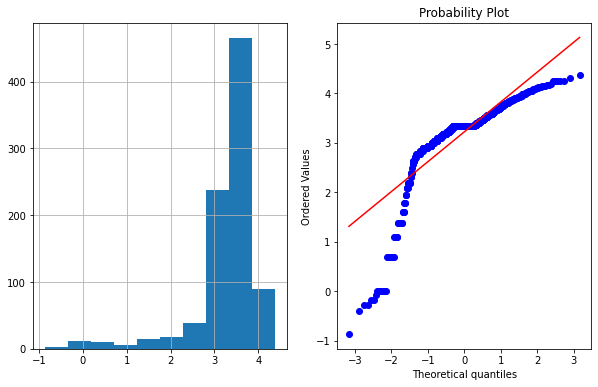

In [69]:
###logarithmic Transformation
df['age_log']=np.log(df['age'])
plot_data(df,'age_log')

###RECIPROCAL TRANSFORMATION

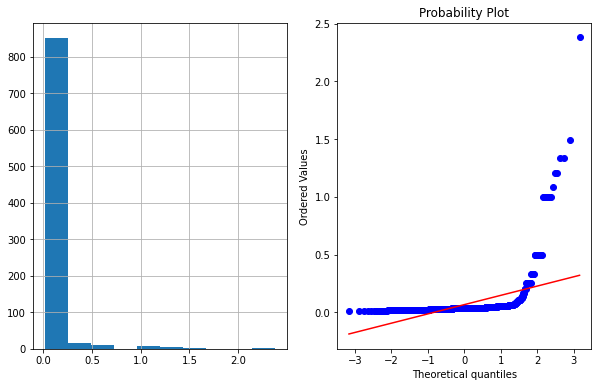

In [73]:
df['age_rec']=1/df.age
plot_data(df,'age_rec')

###Square root transformation

In [74]:
df['age_sq']=df.age**(1/2)

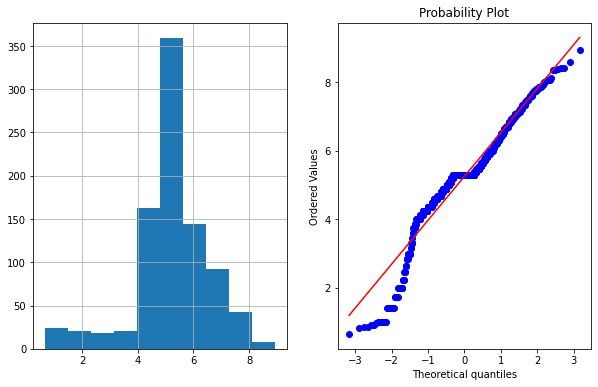

In [75]:
plot_data(df,'age_sq')

###Exponential transformation

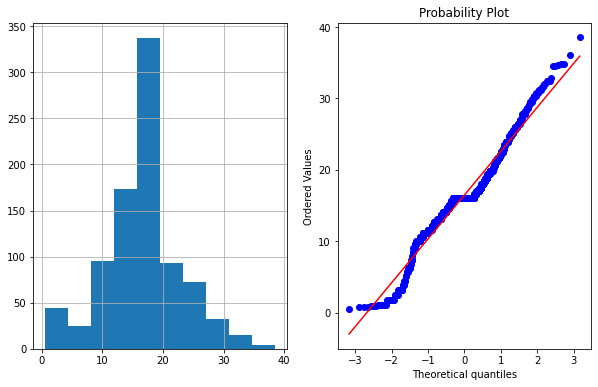

In [76]:
df['age_exp']=df.age**(1/1.2)
plot_data(df,'age_exp')

###BoxCox transformation

In [77]:
df['age_boxcox'],parameters=stat.boxcox(df['age'])

In [78]:
print(parameters)

0.7964531473656952


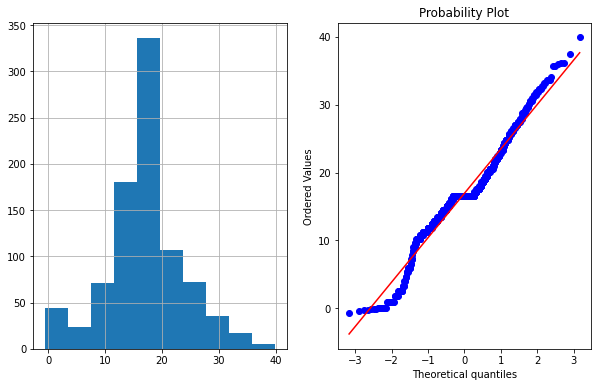

In [79]:
plot_data(df,'age_boxcox')

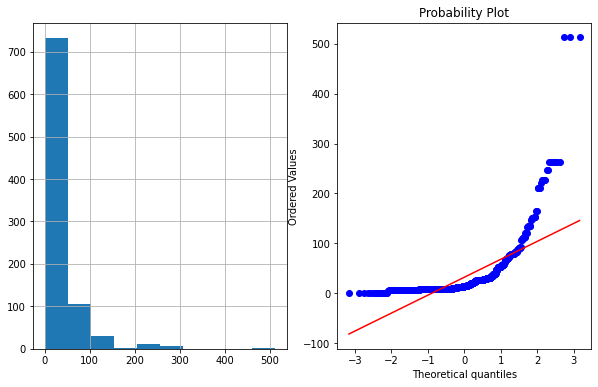

In [70]:
plot_data(df,'fare')

#Note for error in logirthmic transformation try using log1p

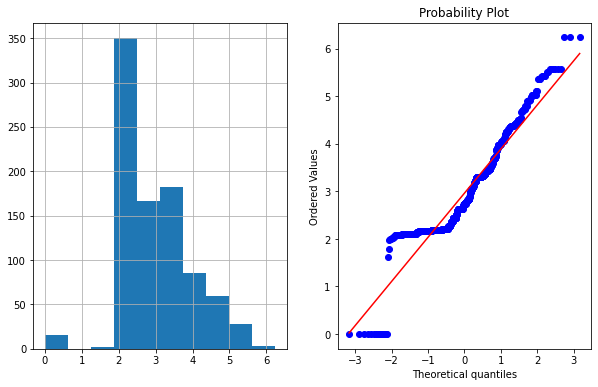

In [80]:
###logarithmic Transformation
df['fare_log']=np.log1p(df['fare'])
plot_data(df,'fare_log')

In [83]:
df['fare_boxcox'],parameters=stat.boxcox(df['fare']+1)

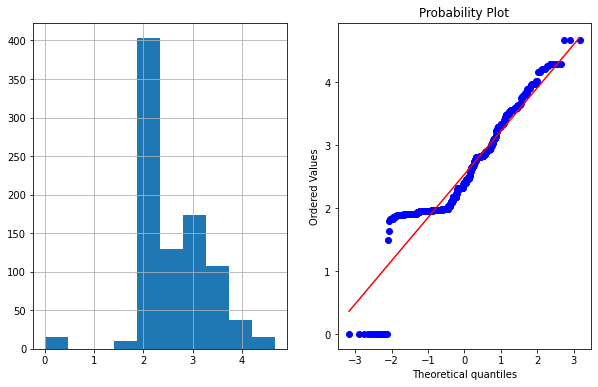

In [85]:
plot_data(df,'fare_boxcox')

Note for handling negative value we can use it using +1